# Analisis dan Prediksi Penjualan Cafe Merak

Nabila Vebyka Zhafira 2602204310
Lavender Nathania Adelya 2602108483

# Pendapatan Merak

In [ ]:
import pandas as pd # untuk memanggil fungsi-fungsi dari pandas tanpa harus mengetik secara penuh

data = pd.read_excel('pendapatan_merak.xlsx') # memuat data dari pendapatan merak dan digunakan agar dapat membaca file excel
data.head() # untuk menampilkan lima baris pertama dari DataFrame data

,Date time,Kode Struk,Revenue,Profit/Loss
0,2024-09-01,8.984932e+19,648000,343500
1,2024-09-02,8.984932e+19,826000,479700
2,2024-09-03,8.984932e+19,771000,444000
3,2024-09-04,8.984932e+19,1192000,673000
4,2024-09-05,8.984932e+19,1033000,608000


In [ ]:
data.info() # untuk memberikan ringkasan tentang DataFrame seperti jumlah baris dan kolom, detail tipe data tiap kolom, dll

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date time    30 non-null     datetime64[ns]
 1   Kode Struk   30 non-null     float64       
 2   Revenue      30 non-null     int64         
 3   Profit/Loss  30 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.1 KB


In [ ]:
summary = data.describe() # memberikan ringkasan angka dari data, seperti rata-rata, nilai terendah, tertinggi, dan beberapa angka tengah dari data tersebut
summary.head() # menunjukkan lima hasil pertama dari ringkasan itu

,Date time,Kode Struk,Revenue,Profit/Loss
count,30,3.000000e+01,30.000000,30.000000
mean,2024-09-15 12:00:00,8.984932e+19,931133.333333,554726.666667
min,2024-09-01 00:00:00,8.984932e+19,346000.000000,216500.000000
25%,2024-09-08 06:00:00,8.984932e+19,718250.000000,412500.000000
50%,2024-09-15 12:00:00,8.984932e+19,876000.000000,522000.000000


In [ ]:
data['Kode Struk'] = data['Kode Struk'].astype(str)
# mengubah angka pada kolom kode struk menjadi teks di dalam tabel data,
# sehingga semua angka di kolom itu sekarang menjadi kata-kata

In [ ]:
data['Tanggal'] = data['Date time'].dt.date
# untuk membuat kolom baru yaitu Tanggal di dalam tabel data
# dan kolom ini akan mengambil hanya bagian tanggal dari kolom Date time.

In [ ]:
# Mengganti nama kolom 'Date time' menjadi 'Tanggal'
data.rename(columns={'Datetime': 'Tanggal'}, inplace=True)

# Tampilkan DataFrame untuk memastikan perubahan
print(data)

    Date time            Kode Struk  Revenue  Profit/Loss     Tanggal
0  2024-09-01  8.98493202409012e+19   648000       343500  2024-09-01
1  2024-09-02  8.98493202409022e+19   826000       479700  2024-09-02
2  2024-09-03  8.98493202409032e+19   771000       444000  2024-09-03
3  2024-09-04  8.98493202409042e+19  1192000       673000  2024-09-04
4  2024-09-05  8.98493202409052e+19  1033000       608000  2024-09-05
5  2024-09-06  8.98493202409062e+19   713000       392000  2024-09-06
6  2024-09-07  8.98493202409072e+19   885000       517500  2024-09-07
7  2024-09-08  8.98493202409082e+19  1156000       686500  2024-09-08
8  2024-09-09  8.98493202409092e+19   452000       259000  2024-09-09
9  2024-09-10  8.98493202409102e+19  1060000       627000  2024-09-10
10 2024-09-11  8.98493202409112e+19   740000       463500  2024-09-11
11 2024-09-12  8.98493202409122e+19   797000       489000  2024-09-12
12 2024-09-13  8.98493202409132e+19   587000       342500  2024-09-13
13 2024-09-14  8.984

In [ ]:
data['Margin (%)'] = (data['Profit/Loss'] / data['Revenue']) * 100
# membuat kolom baru 'Margin (%)' yang menunjukkan berapa persen keuntungan dari pendapatan.
# caranya dengan membagi keuntungan dengan pendapatan, lalu dikali 100.

In [ ]:
duplicates = data.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")
# mencari dan menghitung berapa banyak data yang sama persis atau duplikat di dalam tabel.

Jumlah duplikasi: 0


In [ ]:
def detect_outliers_iqr(column): # fungsi untuk menemukan data yg berbeda/aneh (outliers) dalam suatu kolom
    Q1 = data[column].quantile(0.25) # nilai dimana 25% data lebih kecil dari nilai tersebut
    Q3 = data[column].quantile(0.75) # nilai dimana 75% data lebih kecil dari nilai tersebut
    IQR = Q3 - Q1 # IQR = rentang antara Q1 dan Q3, dan ini memberikan idde tentang seberapa tersebar data di tengah
    # untuk menentukan batas bawah dan atas, data dianggap aneh jika lebih rendah dari hasil lower bound
    # atau lebih tinggi dari hasil upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # mencari data yang di luar batas bawah dan atas dan dianggap sebagai outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_revenue = detect_outliers_iqr('Revenue') # memanggil fungsi utk kolom Revenue. Lalu baris data yg dianggap sbg outliers berdasarkan nilai Revenue akan disimpan di variabel outliers_revenue
outliers_profit = detect_outliers_iqr('Profit/Loss') # memanggil fungsi utk kolom Profit/Loss. Lalu baris data yg dianggap sbg outliers berdasarkan nilai Profit/Loss akan disimpan di variabel outliers_profit


print(f"Outlier pada Revenue:\n{outliers_revenue}")
print(f"Outlier pada Profit/Loss:\n{outliers_profit}")

# Tampilkan data setelah preprocessing
print(data.head())

Outlier pada Revenue:
    Date time            Kode Struk  Revenue  Profit/Loss     Tanggal  \
15 2024-09-16  8.98493202409162e+19  2031000      1194900  2024-09-16   
18 2024-09-19  8.98493202409192e+19  1819000      1097500  2024-09-19   

    Margin (%)  
15   58.833087  
18   60.335349  
Outlier pada Profit/Loss:
    Date time            Kode Struk  Revenue  Profit/Loss     Tanggal  \
15 2024-09-16  8.98493202409162e+19  2031000      1194900  2024-09-16   
18 2024-09-19  8.98493202409192e+19  1819000      1097500  2024-09-19   

    Margin (%)  
15   58.833087  
18   60.335349  
   Date time            Kode Struk  Revenue  Profit/Loss     Tanggal  \
0 2024-09-01  8.98493202409012e+19   648000       343500  2024-09-01   
1 2024-09-02  8.98493202409022e+19   826000       479700  2024-09-02   
2 2024-09-03  8.98493202409032e+19   771000       444000  2024-09-03   
3 2024-09-04  8.98493202409042e+19  1192000       673000  2024-09-04   
4 2024-09-05  8.98493202409052e+19  1033000       

In [ ]:
data.head()

,Date time,Kode Struk,Revenue,Profit/Loss,Tanggal,Margin (%)
0,2024-09-01,8.98493202409012e+19,648000,343500,2024-09-01,53.009259
1,2024-09-02,8.98493202409022e+19,826000,479700,2024-09-02,58.075061
2,2024-09-03,8.98493202409032e+19,771000,444000,2024-09-03,57.587549
3,2024-09-04,8.98493202409042e+19,1192000,673000,2024-09-04,56.459732
4,2024-09-05,8.98493202409052e+19,1033000,608000,2024-09-05,58.857696


# Menu Merak

In [ ]:
data1 = pd.read_excel('menu_merak.xlsx')
data1.head()

,Tanggal,Jam,Banyak,Menu,Harga,Total Harga
0,2024-09-01,14:21:05,1,Ice/Hot Chocolate,18000,18000
1,2024-09-01,15:35:42,1,Es Kopi Susu Coconut,15000,15000
2,2024-09-01,15:35:49,1,Ice/Hot Chocolate,18000,18000
3,2024-09-01,15:44:37,1,Mineral Water,5000,5000
4,2024-09-01,15:44:37,1,Ice/Hot Matcha Latte,18000,18000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      1687 non-null   datetime64[ns]
 1   Jam          1687 non-null   object        
 2   Banyak       1687 non-null   int64         
 3   Menu         1687 non-null   object        
 4   Harga        1687 non-null   int64         
 5   Total Harga  1687 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 79.2+ KB


In [ ]:
# 1. Validasi kolom "Total Harga"
# memeriksa setiap baris di DataFrame data1 utk melihat apakah nilai dalam kolom TotalHarga sama dengan hasil perkalian nilai dalam kolom Banyak dan Harga
data_validation = data1[data1['Total Harga'] != data1['Banyak'] * data1['Harga']]
if not data_validation.empty: # untuk memerika agar DataFrame data_validation tidak kosong, yg berarti ada ketidaksesuaian yang ditemukan
    print("Ada ketidaksesuaian pada kolom 'Total Harga':")
    print(data_validation)

Ada ketidaksesuaian pada kolom 'Total Harga':
        Tanggal       Jam  Banyak                   Menu  Harga  Total Harga
104  2024-09-03  11:13:40       1                Kapiten  13000       130000
429  2024-09-08  18:00:58       1                 Waffle  10000         1000
936  2024-09-17  02:01:28       2          Espresso Base  10000        10000
1049 2024-09-18  23:07:45       2            Artisan Tea  10000        10000
1327 2024-09-22  18:37:38       2  Es Kopi Susu Tiramisu  18000        18000


In [ ]:
# mengubah tipe data kolom Jam dalam tabel data data1 menjadi teks, sehingga nanti bisa mudah mengedit dan mengubah format jam
data1['Jam'] = data1['Jam'].astype(str)

In [ ]:
# 2. Ekstraksi fitur waktu

data1['Hari'] = data1['Tanggal'].dt.day_name() # menambahkan kolom baru bernama Hari ke data1, yang berisi nama hari dari tanggal yang diberikan ke dalam kolom Tanggal
data1['Bulan'] = data1['Tanggal'].dt.month_name() # menambahkan kolom Bulan yang berisi nama bulan dari tanggal dalam kolom kolom Tanggal
data1['Jam Pembelian'] = data1['Jam'].str[:2].astype(int) # menambahkan kolom baru Jam Pembelian yang mengambil dua karakter pertama dari kolom Jam dan dikonversi jadi integer

In [ ]:
# 3. Tambahkan kategori waktu
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

# Kode ini menambahkan kolom 'Kategori Waktu' ke data1, mengklasifikasikan jam pembelian ke 'Pagi', 'Siang', 'Sore', atau 'Malam'
#menggunakan fungsi categorize_time.
data1['Kategori Waktu'] = data1['Jam Pembelian'].apply(categorize_time)

In [ ]:
# 4. Normalisasi/membersihkan dan memformat ulang teks di kolom "Menu"
data1['Menu'] = data1['Menu'].str.strip().str.title()
# .str.strip(): Menghapus spasi ekstra di awal dan akhir teks setiap baris.
# .str.title(): Mengubah setiap kata dalam teks menjadi huruf kapital di awal dan huruf kecil sisanya, mirip judul buku.

In [ ]:
# 5. Pemeriksaan duplikasi
duplicates = data1.duplicated().sum()
print(f"Jumlah duplikasi: {duplicates}")

Jumlah duplikasi: 1


In [ ]:
# 6. Deteksi outlier pada "Harga" dan "Total Harga"
def detect_outliers_iqr(column): # fungsi untuk menemukan data yg berbeda/aneh (outliers) dalam suatu kolom
    Q1 = data1[column].quantile(0.25) # nilai dimana 25% data lebih kecil dari nilai tersebut
    Q3 = data1[column].quantile(0.75) # nilai dimana 75% data lebih kecil dari nilai tersebut
    IQR = Q3 - Q1 # IQR = rentang antara Q1 dan Q3, dan ini memberikan idde tentang seberapa tersebar data di tengah
    # untuk menentukan batas bawah dan atas, data dianggap aneh jika lebih rendah dari hasil lower bound
    # atau lebih tinggi dari hasil upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # mencari data yang di luar batas bawah dan atas dan dianggap sebagai outliers
    outliers = data1[(data1[column] < lower_bound) | (data1[column] > upper_bound)]
    return outliers

outliers_harga = detect_outliers_iqr('Harga') # memanggil fungsi utk kolom Harga. Lalu baris data yg dianggap sbg outliers berdasarkan nilai Harga akan disimpan di variabel outliers_harga
outliers_total_harga = detect_outliers_iqr('Total Harga') # memanggil fungsi utk kolom Total Harga. Lalu baris data yg dianggap sbg outliers berdasarkan nilai Total Harga akan disimpan di variabel outliers_total_harga

print(f"Outlier pada Harga:\n{outliers_harga}")
print(f"Outlier pada Total Harga:\n{outliers_total_harga}")

Outlier pada Harga:
        Tanggal       Jam  Banyak           Menu  Harga  Total Harga    Hari  \
3    2024-09-01  15:44:37       1  Mineral Water   5000         5000  Sunday   
7    2024-09-01  17:01:04       1         Waffle  10000        10000  Sunday   
9    2024-09-01  17:49:31       1   100% Arabica   2000         2000  Sunday   
20   2024-09-01  19:15:34       1         Waffle  10000        10000  Sunday   
38   2024-09-01  22:43:03       1  Mineral Water   5000         5000  Sunday   
...         ...       ...     ...            ...    ...          ...     ...   
1654 2024-09-30  20:09:54       1    Artisan Tea  10000        10000  Monday   
1660 2024-09-30  21:03:13       1  Mineral Water   5000         5000  Monday   
1661 2024-09-30  21:03:13       1    Artisan Tea  10000        10000  Monday   
1675 2024-09-30  21:34:53       2  Mineral Water   5000        10000  Monday   
1678 2024-09-30  21:46:01       1    Artisan Tea  10000        10000  Monday   

          Bulan  Ja

In [ ]:
# Tampilkan hanya 5 data setelah preprocessing
data1.head()

,Tanggal,Jam,Banyak,Menu,Harga,Total Harga,Hari,Bulan,Jam Pembelian,Kategori Waktu
0,2024-09-01,14:21:05,1,Ice/Hot Chocolate,18000,18000,Sunday,September,14,Siang
1,2024-09-01,15:35:42,1,Es Kopi Susu Coconut,15000,15000,Sunday,September,15,Siang
2,2024-09-01,15:35:49,1,Ice/Hot Chocolate,18000,18000,Sunday,September,15,Siang
3,2024-09-01,15:44:37,1,Mineral Water,5000,5000,Sunday,September,15,Siang
4,2024-09-01,15:44:37,1,Ice/Hot Matcha Latte,18000,18000,Sunday,September,15,Siang


Karena masih ada data pada total harga yang tidak sesuai, maka dilakukan pembenahan total harga yang error menjadi total harga corrected.

In [ ]:
import pandas as pd

# Asumsi data1 adalah DataFrame Anda
# Baris ini membuat kolom baru yang menghitung ulang 'Total Harga' berdasarkan perkalian jumlah barang (Banyak) dengan harga satuan (Harga).
data1['Total Harga Corrected'] = data1['Banyak'] * data1['Harga']
# Kolom 'Error' dibuat untuk menandai baris mana yang memiliki kesalahan pada 'Total Harga' asli.
data1['Error'] = data1['Total Harga'] != data1['Total Harga Corrected']

# Tampilkan semua baris yang masih memiliki error
print(data1[data1['Error']])

        Tanggal       Jam  Banyak                   Menu  Harga  Total Harga  \
104  2024-09-03  11:13:40       1                Kapiten  13000       130000   
429  2024-09-08  18:00:58       1                 Waffle  10000         1000   
936  2024-09-17  02:01:28       2          Espresso Base  10000        10000   
1049 2024-09-18  23:07:45       2            Artisan Tea  10000        10000   
1327 2024-09-22  18:37:38       2  Es Kopi Susu Tiramisu  18000        18000   

           Hari      Bulan  Jam Pembelian Kategori Waktu  \
104     Tuesday  September             11           Pagi   
429      Sunday  September             18           Sore   
936     Tuesday  September              2          Malam   
1049  Wednesday  September             23          Malam   
1327     Sunday  September             18           Sore   

      Total Harga Corrected  Error  
104                   13000   True  
429                   10000   True  
936                   20000   True  
1049      

In [ ]:
# menggantikan 'Total Harga' dengan 'Total Harga Corrected'
data1['Total Harga'] = data1['Total Harga Corrected']

# hapus kolom 'Total Harga Corrected' dan 'Error' jika tidak diperlukan lagi
data1.drop(['Total Harga Corrected', 'Error'], axis=1, inplace=True)

In [ ]:
# cek lagi apakah ada kesalahan setelah perbaikan
data1['Check Error'] = data1['Total Harga'] != data1['Banyak'] * data1['Harga']
print(data1[data1['Check Error']])

Empty DataFrame
Columns: [Tanggal, Jam, Banyak, Menu, Harga, Total Harga, Hari, Bulan, Jam Pembelian, Kategori Waktu, Check Error]
Index: []


Cek kembali di data validation

In [ ]:
# Kode ini mengecek dan menampilkan baris dari data1 dengan kesalahan di "Total Harga", berdasarkan perkalian jumlah barang dan harga.
data_validation = data1[data1['Total Harga'] != data1['Banyak'] * data1['Harga']]
if not data_validation.empty:
    print("Ada ketidaksesuaian pada kolom 'Total Harga':")
    print(data_validation)

# Combine Data

In [ ]:
# mengubah data di kolom 'Tanggal' dari data menjadi tipe datetime.
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# menggabungkan data dan data1 berdasarkan kolom tanggal
combined_data = pd.merge(data, data1, on='Tanggal', how='outer')

In [ ]:
# Tampilkan data hasil merge
print(combined_data)

      Date time            Kode Struk   Revenue  Profit/Loss    Tanggal  \
0    2024-09-01  8.98493202409012e+19  648000.0     343500.0 2024-09-01   
1    2024-09-01  8.98493202409012e+19  648000.0     343500.0 2024-09-01   
2    2024-09-01  8.98493202409012e+19  648000.0     343500.0 2024-09-01   
3    2024-09-01  8.98493202409012e+19  648000.0     343500.0 2024-09-01   
4    2024-09-01  8.98493202409012e+19  648000.0     343500.0 2024-09-01   
...         ...                   ...       ...          ...        ...   
1683        NaT                   NaN       NaN          NaN 2204-09-13   
1684        NaT                   NaN       NaN          NaN 2204-09-13   
1685        NaT                   NaN       NaN          NaN 2204-09-13   
1686        NaT                   NaN       NaN          NaN 2204-09-13   
1687        NaT                   NaN       NaN          NaN 2204-09-13   

      Margin (%)       Jam  Banyak                      Menu    Harga  \
0      53.009259  14:21:05

In [ ]:
# Menyimpan DataFrame yang digabung ke file CSV
combined_data.to_csv('combined_data.csv', index=False)

In [ ]:
dataset = pd.read_csv('combined_data.csv') # memuat data dari file CSV yg bernama combined_data.csv
dataset.head()

,Date time,Kode Struk,Revenue,Profit/Loss,Tanggal,Margin (%),Jam,Banyak,Menu,Harga,Total Harga,Hari,Bulan,Jam Pembelian,Kategori Waktu,Check Error
0,2024-09-01,8.984932e+19,648000.0,343500.0,2024-09-01,53.009259,14:21:05,1.0,Ice/Hot Chocolate,18000.0,18000.0,Sunday,September,14.0,Siang,False
1,2024-09-01,8.984932e+19,648000.0,343500.0,2024-09-01,53.009259,15:35:42,1.0,Es Kopi Susu Coconut,15000.0,15000.0,Sunday,September,15.0,Siang,False
2,2024-09-01,8.984932e+19,648000.0,343500.0,2024-09-01,53.009259,15:35:49,1.0,Ice/Hot Chocolate,18000.0,18000.0,Sunday,September,15.0,Siang,False
3,2024-09-01,8.984932e+19,648000.0,343500.0,2024-09-01,53.009259,15:44:37,1.0,Mineral Water,5000.0,5000.0,Sunday,September,15.0,Siang,False
4,2024-09-01,8.984932e+19,648000.0,343500.0,2024-09-01,53.009259,15:44:37,1.0,Ice/Hot Matcha Latte,18000.0,18000.0,Sunday,September,15.0,Siang,False


Penambahan data untuk data visitor

In [ ]:
import pandas as pd

# baca data visitor dari file Excel
visitor_data = pd.read_excel('visitor_merak.xlsx')

# buat DataFrame baru dengan kolom 'Tanggal', 'Hari', dan 'VisitorCount'
# asumsikan kolom di visitor_data bernama 'Hari' dan 'VisitorCount'
all_dates_september = pd.date_range(start='2024-09-01', end='2024-09-30')
september_data = pd.DataFrame({'Tanggal': all_dates_september})
september_data['Time'] = september_data['Tanggal'].dt.day_name()
september_data = pd.merge(september_data, visitor_data, on='Time', how='left')

# check nama kolom di september_data
print(september_data.columns)

# gabungkan data dengan dataset utama
# buat kolom Time di dataset sebelum di merge
dataset['Time'] = pd.to_datetime(dataset['Date time']).dt.day_name()# buat kolom Time di dataset menggunakan kolom Data Time

dataset = pd.merge(dataset, september_data[['Time', 'Total Visitor']], on='Time', how='left') # ganti TotalVisitor menjadi Total Visitor

# periksa dataset yang sudah digabungkan
print(dataset.head())

Index(['Tanggal', 'Time', 'Total Visitor'], dtype='object')
    Date time    Kode Struk   Revenue  Profit/Loss     Tanggal  Margin (%)  \
0  2024-09-01  8.984932e+19  648000.0     343500.0  2024-09-01   53.009259   
1  2024-09-01  8.984932e+19  648000.0     343500.0  2024-09-01   53.009259   
2  2024-09-01  8.984932e+19  648000.0     343500.0  2024-09-01   53.009259   
3  2024-09-01  8.984932e+19  648000.0     343500.0  2024-09-01   53.009259   
4  2024-09-01  8.984932e+19  648000.0     343500.0  2024-09-01   53.009259   

        Jam  Banyak               Menu    Harga  Total Harga    Hari  \
0  14:21:05     1.0  Ice/Hot Chocolate  18000.0      18000.0  Sunday   
1  14:21:05     1.0  Ice/Hot Chocolate  18000.0      18000.0  Sunday   
2  14:21:05     1.0  Ice/Hot Chocolate  18000.0      18000.0  Sunday   
3  14:21:05     1.0  Ice/Hot Chocolate  18000.0      18000.0  Sunday   
4  14:21:05     1.0  Ice/Hot Chocolate  18000.0      18000.0  Sunday   

       Bulan  Jam Pembelian Kategori W

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date time       7166 non-null   object 
 1   Kode Struk      7166 non-null   float64
 2   Revenue         7166 non-null   float64
 3   Profit/Loss     7166 non-null   float64
 4   Tanggal         7204 non-null   object 
 5   Margin (%)      7166 non-null   float64
 6   Jam             7200 non-null   object 
 7   Banyak          7200 non-null   float64
 8   Menu            7200 non-null   object 
 9   Harga           7200 non-null   float64
 10  Total Harga     7200 non-null   float64
 11  Hari            7200 non-null   object 
 12  Bulan           7200 non-null   object 
 13  Jam Pembelian   7200 non-null   float64
 14  Kategori Waktu  7200 non-null   object 
 15  Check Error     7200 non-null   object 
 16  Time            7166 non-null   object 
 17  Total Visitor   7166 non-null   f

In [ ]:
dataset['Date time'] = pd.to_datetime(data['Date time'])
dataset['DayOfWeek'] = data['Date time'].dt.day_name()
dataset['Hour'] = dataset['Date time'].dt.hour

#kode ini mengubah 'Date time' di dataset menjadi tipe datetime, lalu menambahkan kolom untuk nama hari dan jam,
# memfasilitasi analisis berdasarkan waktu.

In [ ]:
# Menyimpan DataFrame yang digabung ke file CSV
dataset.to_csv('merged_data.csv', index=False)

# Machine Learning

Implementasi Model

Prediksi Permintaan dengan KNN

In [ ]:
!pip install sklearn #install library sklearn yg banyak digunakan untuk ML
import pandas as pd
from sklearn.model_selection import train_test_split # untuk membagi data menjadi set pelatihan dan pengujian dan membantu dalam memvalidasi kinerja ML
from sklearn.preprocessing import StandardScaler # untuk menskala fitur ke unit varians dan rata-rata nol.
from sklearn.neighbors import KNeighborsRegressor # implementasi dari algoritma k-nearest neighbors untuk regresi.
from sklearn.impute import SimpleImputer # untuk mengisi nilai yang hilang dalam dataset,

# asumsi kita prediksi jumlah pengunjung berdasarkan hari dan jam
X = dataset[['DayOfWeek', 'Hour']]  # ini harus di-encode atau diubah menjadi numerik
X = pd.get_dummies(X)
y = dataset['Total Visitor']  # asumsi kolom ini ada

# Menangani nilai yang hilang menggunakan SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # atau strategi = 'mean' jika itu adalah fitur numerik
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)) # membentuk ulang y untuk imputer

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# membagi data menjadi set pelatihan dan pengujian, menskalakan fitur, dan menyesuaikan model menggunakan set pelatihan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# membentuk ulang y_train dan y_test kembali ke array 1D
y_train = y_train.ravel()
y_test = y_test.ravel()

# kode ini membagi dan menskalakan data, kemudian melatih model KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementasi KNN
knn = KNeighborsRegressor(n_neighbors=5) # model akan mempertimbangkan lima tetangga terdekat untuk melakukan prediksi.
knn.fit(X_train_scaled, y_train) # menyuruh model KNN untuk 'belajar' atau memfitting diri pada data pelatihan yang telah diskala.

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test_scaled) # memperkirakan nilai target (y_pred) untuk set pengujian (X_test_scaled) menggunakan model KNN
from sklearn.metrics import mean_squared_error # untuk menghitung rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai sebenarnya
mse = mean_squared_error(y_test, y_pred) # menghitung MSE antara nilai sebenarnya (y_test) dan nilai yang diprediksi (y_pred)
print(f'MSE: {mse}') #  menampilkan nilai MSE yang dihitung

MSE: 1031.491880638445


Analisis frekuensi atau popularitas item menu tertentu dengan DBSCAN

In [ ]:
import pandas as pd # untuk memanggil fungsi-fungsi dari pandas tanpa harus mengetik secara penuh
from sklearn.preprocessing import StandardScaler # untuk penskalaan fitur
from sklearn.cluster import DBSCAN # untuk clustering

# muat data
data = pd.read_csv('combined_data.csv')

# pastikan kolom 'Menu' tidak memiliki nilai hilang dan memastikan bahwa perubahan langsung diterapkan pada DataFrame asli tanpa perlu membuat salinan baru
data['Menu'].dropna(inplace=True)


In [ ]:
# untuk menghitung berapa kali setiap item unik muncul dalam kolom 'Menu'.
# mengubah Series yang dihasilkan menjadi DataFrame, di mana index lama menjadi
# kolom pertama dan frekuensi menjadi kolom kedua
item_counts = data['Menu'].value_counts().reset_index()
# Mengganti nama kolom DataFrame yang baru. 'index' diubah menjadi 'Menu' dan kolom
# frekuensi diubah menjadi 'Frequency'.
item_counts.columns = ['Menu', 'Frequency']

# Tampilkan frekuensi
print(item_counts.head())


                   Menu  Frequency
0           Artisan Tea         86
1  Es Kopi Susu Coconut         73
2         Mineral Water         70
3  Es Kopi Susu Baileys         66
4      Es Kopi Susu Ori         64


In [ ]:
scaler = StandardScaler() # untuk menskala fitur agar memiliki rata-rata 0 dan varians 1.
# untuk menghitung rata-rata dan standar deviasi dari kolom Frekuensi lalu menggunakan
# statistik ini untuk menskalakan data
frequency_scaled = scaler.fit_transform(item_counts[['Frequency']])

In [ ]:
# tentukan parameter untuk DBSCAN
eps_value = 0.5  # nilai eps harus disesuaikan berdasarkan skala data
min_samples_value = 5  # minimal sampel dalam sebuah cluster

# lakukan clustering
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value) # membuat instance dari DBSCAN dengan parameter yang telah ditetapkan.
# fungsi fit_predict() menjalankan DBSCAN pada data yang telah diskalakan dan
# mengembalikan label cluster untuk setiap poin, dengan label -1 menunjukkan 'noise'.
clusters = dbscan.fit_predict(frequency_scaled)

# menambahkan cluster ke dataframe frekuensi
item_counts['Cluster'] = clusters


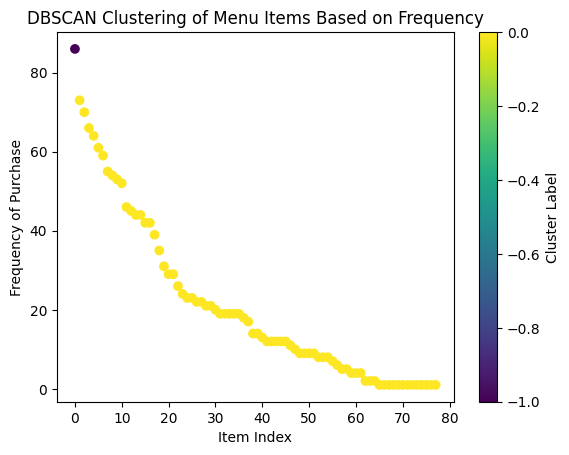

Cluster
-1     1
 0    77
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil clustering
# membuat scatter plot dengan indeks item sb x dan frekuensi pembelian sb y
# menentukan warna titik dan colormap pada label cluster
plt.scatter(item_counts.index, item_counts['Frequency'], c=item_counts['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster Label') # colorbar untuk menunjukkan warna yang berkolerasi dengan label cluster
plt.xlabel('Item Index') # mengatur label untuk sb x dengan label Item Index
plt.ylabel('Frequency of Purchase') # mengatur label untuk sb y dengan label Frequency of Purchase
plt.title('DBSCAN Clustering of Menu Items Based on Frequency')
plt.show()

# memberikan gambaran tentang distribusi item menu dalam setiap cluster berdasarkan frekuensi pembelian mereka.
print(item_counts.groupby('Cluster').size())


Optimisasi Harga dengan SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # untuk membagi data
from sklearn.preprocessing import StandardScaler # untuk menskala data
from sklearn.svm import SVR # untuk regresi
import matplotlib.pyplot as plt # untuk visualisasi data

# muat data
data = pd.read_csv('combined_data.csv')

# menghapus baris yang mengandung nilai NaN pada kolom 'Banyak', 'Harga', atau 'Total Harga'
data.dropna(subset=['Banyak', 'Harga', 'Total Harga'], inplace=True)

In [ ]:
X = data[['Banyak', 'Harga']] # matriks fitur yang berisi data tentang jumlah barang dan harga per barang.
y = data['Total Harga'] # vektor yang berisi nilai total harga dari setiap transaksi.

In [ ]:
# Kode ini membagi data menjadi set pelatihan dan pengujian dengan 80% data untuk pelatihan dan 20% untuk pengujian,
# menggunakan random_state=42 untuk memastikan konsistensi pemisahan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# untuk memastikan bahwa kedua set data memiliki rata-rata nol dan varians satu,
# membantu meningkatkan kinerja dan stabilitas algoritma pembelajaran mesin.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Kode ini inisialisasi dan melatih model Support Vector Regression (SVR) dengan kernel RBF menggunakan
# data pelatihan yang telah diskalakan.
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred = svr.predict(X_test_scaled) # enghasilkan prediksi untuk set pengujian yang telah diskalakan.

# menghitung rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai sebenarnya,
# mengukur rata-rata variasi antara prediksi dan nilai aktual.
# menghitung koefisien determinasi (R²)
from sklearn.metrics import mean_squared_error, r2_score

# menampilkan hasil MSE dan R², memberikan insight tentang akurasi dan keefektifan model dalam membuat prediksi
# R² mendekati 1 menunjukkan model yang sangat efektif, sedangkan MSE yang rendah menunjukkan prediksi yang akurat.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 44692668.62500576
R^2 Score: -0.05749302171254023


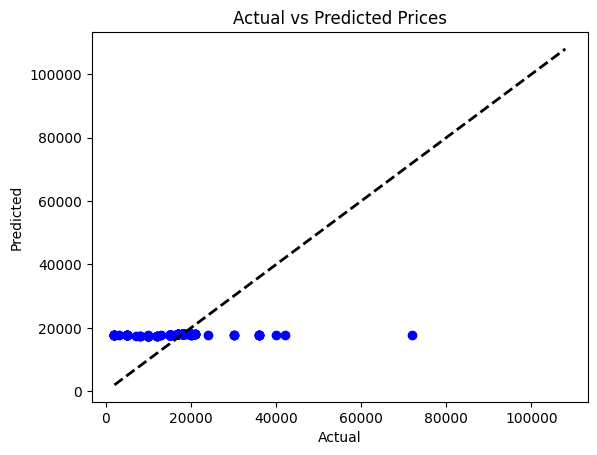

In [ ]:
# membuat scatter plot dengan nilai aktual (y_test) pada sb x dan nilai yg diprediksi (y_pred) pada sb y
# jadi titik2 biru akan menunjukkan hubungan antara nilai sebenarnya dan prediksi
plt.scatter(y_test, y_pred, color='blue')
# untuk menggambar garis lurus (garis identitas) dari nilai minimum sampai maksimum data
# garis ini membantu menilai seberapa dekat titik2 dengan garis sempurna, dimana prediksi cocok sempurna dengan nilai aktual
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()